<hr>
<div class="alert alert-warning">
<center> <h1> Data Mining Project </h1> </center> <br>
<center> 202122_Group_U:  </center>

<center> - Mafalda Garcia (20210763) <center> 
<center> - Simão Pereira (20210250) <center>  
<center> - Tiago Santos (20210548) <center> 

**Table of Contents** <br>
* [1. Import Libraries](#importlibraries)
* [2. Import Dataset](#importdataset)
* [3. Initial Analysis ](#initialanalysis)
* [4. Data Preparation](#datapreparation)
* [5. Data Pre-Processing](#datapreprocessing)
* [6. Clustering](#clustering)
* [7. Cluster Analysis](#clusteranalysis)

<hr>
<a class="anchor" id="importlibraries">
    
# 1. Import libraries
    
</a>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
import math
from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples, confusion_matrix, classification_report
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

<hr>
<a class="anchor" id="importdataset">
    
# 2. Import dataset
    
</a>

In [2]:
#Save the data into a DataFrame
data = pd.read_sas('a2z_insurance.sas7bdat')
data.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


<hr>
<a class="anchor" id="initialanalysis">
    
# 3. Initial Analysis
    
</a>

In [3]:
data.shape

(10296, 14)

In [4]:
data.describe(include='all')

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10296.00000,10266.000000,10279.000000,10279,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,b'3 - BSc/MSc',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,4799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5148.50000,1991.062634,1968.007783,NaN,2506.667057,2.709859,0.706764,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,2972.34352,511.267913,19.709476,NaN,1157.449634,1.266291,0.455268,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1.00000,1974.000000,1028.000000,NaN,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,2574.75000,1980.000000,1953.000000,NaN,1706.000000,1.000000,0.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,5148.50000,1986.000000,1968.000000,NaN,2501.500000,3.000000,1.000000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,7722.25000,1992.000000,1983.000000,NaN,3290.250000,4.000000,1.000000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000


In [5]:
data.info()

#missing values in FirstPolYear, Birthday year, educDeg, MonthSal, GeoLivArea,Children, PremMotor, PremHealth, 
#PremLife and PremWork

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [6]:
#counting missing values
data.isnull().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [7]:
# replace "" by nan
data.replace("", np.nan, inplace=True)

In [8]:
#Checking if there are repeteated records
data.duplicated().value_counts()

False    10296
dtype: int64

In [9]:
#!pip install ipywidgets
#ProfileReport(
#    data,
#    title='Customer Data Preprocessed',
#    correlations={
#        "pearson": {"calculate": True},
#        "spearman": {"calculate": False},
#        "kendall": {"calculate": False},
#        "phi_k": {"calculate": False},
#        "cramers": {"calculate": False},
#    },
#)


#to get an overview of the data and to check if there are any additional problems to take care of
#we concluded that there is none.

<hr>
<a class="anchor" id="datapreparation">
    
# 4. Data Preparation
    
</a>

<a class="anchor" id="metricandnonmetric">

## 4.1. METRIC and NON METRIC FEATURES

</a>

In [10]:
#Dividing the features into categorical and metric
non_metric_features = ['EducDeg']
metric_features = ['BirthYear',
 'MonthSal',
 'GeoLivArea',
 'Children',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']



<a class="anchor" id="fillmissingvalues">

## 4.2. Filling Missing Values

</a>

In [11]:
data2 = data.copy()

In [12]:
#Checking the mode of the categorical feature to substitute the nulls
modes = data2[non_metric_features].mode().loc[0]
modes

EducDeg    b'3 - BSc/MSc'
Name: 0, dtype: object

In [13]:
#Checking the median of the metric features to substitute the nulls
data2.median()

CustID           5148.50
FirstPolYear     1986.00
BirthYear        1968.00
MonthSal         2501.50
GeoLivArea          3.00
Children            1.00
CustMonVal        186.87
ClaimsRate          0.72
PremMotor         298.61
PremHousehold     132.80
PremHealth        162.81
PremLife           25.56
PremWork           25.67
dtype: float64

In [14]:
#First we replace the categorical nulls with the mode, and the numerical nulls with the medians.
data2.fillna(modes, inplace=True)
data2.fillna(data2.median(), inplace=True)

In [15]:
data2.isnull().sum()

CustID           0
FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

<a class="anchor" id="fillmissingvalues">

## 4.3. Incoherence

</a>

In [16]:
#We noticed 2 values that don't make sense, so we are going to eliminate them
metr_filters = (
    (data2['FirstPolYear']<=2016)
    &
    (data2['BirthYear']>=1900)
)

data3 = data2[metr_filters]

In [17]:
#we noticed that there were many customers with insurance that were not even born so we decided to delete the variable "BirthYear" and to keep the variable "FirstPolYear"

data3.drop(columns = ["BirthYear"], inplace=True)
data3

/Users/simaopereira/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,CustID,FirstPolYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,10292.0,1984.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,10293.0,1977.0,b'1 - Basic',2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,10294.0,1994.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [18]:
metric_features = [
 'MonthSal',
 'GeoLivArea',
 'Children',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

<a class="anchor" id="fillmissingvalues">

## 4.4. Outlier Removal

</a>

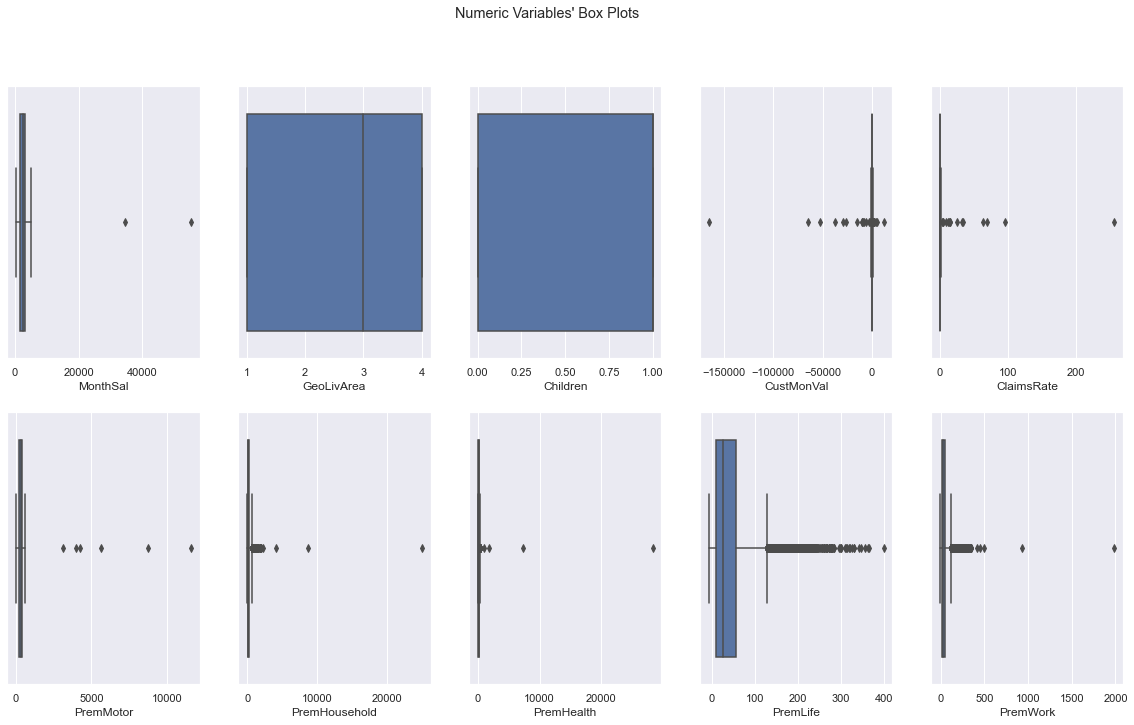

In [19]:
#Plotting the box plot to check for outliers

from math import ceil
sns.set()

fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data3[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [20]:
data3.shape[0]

10294

In [21]:
#Manually eliminating outliers 
metr_filters = (
    (data3['MonthSal']<=20000)
    &
    (data3['ClaimsRate']<=50)
    &
    (data3['PremMotor']<=7500)
    &
    (data3['PremHousehold']<=70000)
    &
    (data3['PremHealth']<=5000)
    &
    (data3['PremWork']<=500)
)

data_manu = data3[metr_filters]

In [22]:
data_manu.shape[0]

10283

In [23]:
#We're checking that we wont eliminate too much information. We verified that with these filters, we'll lose 0.1% of data
(10283-10294)/10294*100

-0.10685836409558966

# **IQR**

In [24]:
data_iqr=data3.copy()

In [25]:
#We will try the Inter Quartile Range approach to delet outliers.
#As we don't want to eliminate too much data, we defined the quartiles between 5% and 95%
Q1 = data_iqr.quantile(0.05)
Q3 = data_iqr.quantile(0.95)
IQR = Q3 - Q1

In [26]:
#Checking the distance between the 1st and the 3rd quartiles
print(IQR)

CustID           9265.700
FirstPolYear       20.000
MonthSal         3111.350
GeoLivArea          3.000
Children            1.000
CustMonVal        739.440
ClaimsRate          0.940
PremMotor         451.640
PremHousehold     725.700
PremHealth        242.763
PremLife          140.580
PremWork          139.690
dtype: float64


In [27]:
data_iqr = data_iqr[~((data_iqr < (Q1 - 1.5 * IQR)) |(data_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]
data_iqr.shape

<ipython-input-27-9f2df9c9dbfb>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_iqr = data_iqr[~((data_iqr < (Q1 - 1.5 * IQR)) |(data_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-27-9f2df9c9dbfb>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_iqr = data_iqr[~((data_iqr < (Q1 - 1.5 * IQR)) |(data_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]


(10249, 13)

In [28]:
#We're checking how much info we would eliminate
(1-(data_iqr.shape[0] / data3.shape[0]))*100

0.4371478531183248

# **LOF**


In [29]:
#We will try the Local Outlier Factor approach to delet outliers.
data_lof=data3.copy()

In [30]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=50)

In [31]:
lof_pred=lof.fit_predict(data_lof[metric_features])
outlier_index = data_lof[lof_pred == -1]
outlier_index

,CustID,FirstPolYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
51,52.0,1982.0,b'3 - BSc/MSc',3234.0,4.0,1.0,-14714.08,25.36,557.44,20.00,29.56,5.00,-9.00
112,113.0,1997.0,b'4 - PhD',2354.0,1.0,1.0,-8719.04,15.65,518.32,4.45,55.90,3.89,10.89
135,136.0,1997.0,b'3 - BSc/MSc',2176.0,4.0,1.0,-10198.91,14.80,297.61,162.80,143.36,136.47,-3.00
145,146.0,1983.0,b'1 - Basic',2554.0,1.0,1.0,-96.11,1.12,144.36,-11.10,381.85,47.23,12.78
149,150.0,1989.0,b'1 - Basic',984.0,4.0,1.0,255.71,0.63,64.90,197.25,29.56,18.56,451.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,9955.0,1974.0,b'1 - Basic',768.0,4.0,1.0,-416.73,1.55,21.67,136.70,27.45,177.81,350.62
10026,10027.0,1995.0,b'1 - Basic',1855.0,1.0,1.0,-307.27,1.51,92.13,-30.00,237.71,122.80,129.47
10116,10117.0,1979.0,b'2 - High School',1958.0,2.0,1.0,-223.23,1.39,163.03,-75.00,177.59,48.23,191.26
10269,10270.0,1990.0,b'2 - High School',1858.0,1.0,1.0,-207.91,1.34,175.59,-40.55,256.16,142.36,11.00


In [32]:
#We concluded we would eliminate less than 3% of the data
(outlier_index.shape[0] / data3.shape[0])*100

0.990868467068195

In [33]:
data_nonoutliers = data_lof[lof_pred != -1]
data_nonoutliers

,CustID,FirstPolYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,10291.0,1994.0,b'1 - Basic',626.0,3.0,1.0,176.26,0.85,6.89,878.50,103.13,113.02,201.26
10291,10292.0,1984.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10293,10294.0,1994.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


# **Z-SCORE**

In [34]:
data_zscore=data3.copy()

In [35]:
#We will try the Z-score approach to delet outliers.
from scipy import stats
zscore = np.abs(stats.zscore(data_zscore[metric_features]))
print(zscore)
print(np.where(zscore > 15))

[[0.28520765 1.35052827 0.64298408 ... 0.08515451 0.11240206 0.47274828]
 [1.58340142 1.01891918 0.64298408 ... 0.18545859 3.23223318 1.26616828]
 [0.1986614  0.22910336 1.55524845 ... 0.15878521 0.94466731 1.12762394]
 ...
 [0.35610008 1.35052827 0.64298408 ... 0.09904901 0.61408469 0.70657839]
 [0.46349293 0.56071245 0.64298408 ... 0.09067343 0.46972184 1.39828229]
 [0.26695744 1.35052827 0.64298408 ... 0.10242966 0.73636463 0.55069165]]
(array([ 171,  171,  655,  655,  675,  675, 5084, 5128, 5211, 5293, 5882,
       6701, 6835, 7085, 7960, 7960, 8260, 8865, 9148, 9646, 9646]), array([3, 4, 3, 4, 3, 4, 9, 5, 5, 5, 0, 5, 6, 5, 7, 9, 0, 6, 7, 3, 4]))


In [36]:
data_zscore = data_zscore[(zscore < 15).all(axis=1)]
data_zscore.shape

(10278, 13)

In [37]:
#We concluded we would eliminate 15% of the data, which is too much
(1 - (data_zscore.shape[0] / data3.shape[0]))*100


0.15543034777539821

**Conclusion: We will use the LOF approach, given that it is the approach that deletes more outliers, without loosing too much information. We used the 3-5% rule of thumb**

In [38]:
data4=data_nonoutliers.copy()
data4

,CustID,FirstPolYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,10291.0,1994.0,b'1 - Basic',626.0,3.0,1.0,176.26,0.85,6.89,878.50,103.13,113.02,201.26
10291,10292.0,1984.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10293,10294.0,1994.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [39]:
data4.shape

(10192, 13)

<hr>
<a class="anchor" id="datapreprocessing">
    
# 5. Data Pre-Processing
    
</a>

<a class="anchor" id="fillmissingvalues">

## 5.1. Feature Engineering

</a>

In [40]:
#We thought it might be useful to have a variable "Total Premiums" of each customer
#Additionally, for an easier understanding of the variable  "FirstPolYear" we replaced it with how long they have been loyal to the company

data4['PremTotal'] = data4['PremMotor']+data4['PremHousehold']+data4['PremHealth']+data4['PremLife']+data4['PremWork']


data4['LoyaltyYears']= 2016-data4['FirstPolYear']

data4.drop(columns=["FirstPolYear"], inplace = True)
data4.head()

,CustID,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,PremTotal,LoyaltyYears
0,1.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56,31.0
1,2.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,910.96,35.0
2,3.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,740.60,25.0
3,4.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68,26.0
4,5.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24,30.0


In [41]:
metric_features = [
 'LoyaltyYears',
 'MonthSal',
 'GeoLivArea',
 'Children',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'PremTotal']

<a class="anchor" id="fillmissingvalues">

## 5.2. Feature Selection

</a>

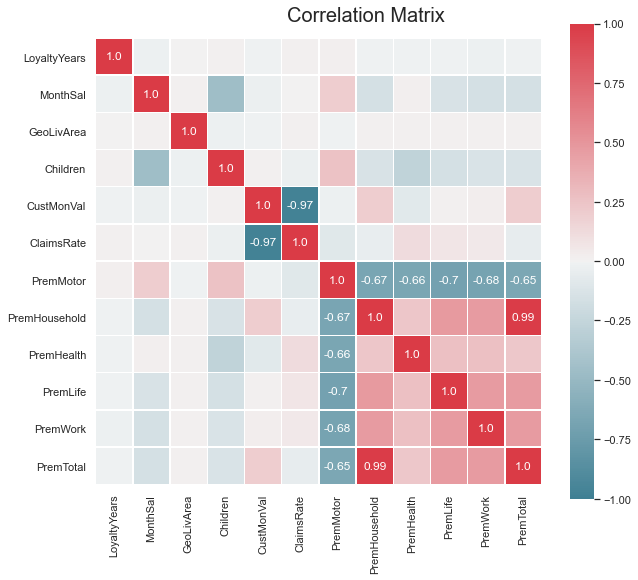

In [42]:
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data4[metric_features].corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)


plt.show()

**Comment**:
Based on the correlation matrix we verified that some variables are highly correlated.
We concluded that the best variables to drop, based on importance we give it within the business knowledge we have, were 
'CustMonVal' and 'PremTotal'.

In [43]:
# Select variables according to their correlations
data5 = data4.copy()
data5.drop(columns=['CustMonVal','PremTotal'], inplace=True)

In [44]:
metric_features = [
 'LoyaltyYears',
 'MonthSal',
 'GeoLivArea',
 'Children',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

In [45]:
data5.head()

,CustID,EducDeg,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LoyaltyYears
0,1.0,b'2 - High School',2177.0,1.0,1.0,0.39,375.85,79.45,146.36,47.01,16.89,31.0
1,2.0,b'2 - High School',677.0,4.0,1.0,1.12,77.46,416.20,116.69,194.48,106.13,35.0
2,3.0,b'1 - Basic',2277.0,3.0,0.0,0.28,206.15,224.50,124.58,86.35,99.02,25.0
3,4.0,b'3 - BSc/MSc',1099.0,4.0,1.0,0.99,182.48,43.35,311.17,35.34,28.34,26.0
4,5.0,b'3 - BSc/MSc',1763.0,4.0,1.0,0.90,338.62,47.80,182.59,18.78,41.45,30.0


In [46]:
#data5.to_csv('data_5final.csv')

<a class="anchor" id="fillmissingvalues">

## 5.3. Data Normalization

</a>

In [47]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,StandardScaler, RobustScaler

**MinMax Scaler**

In [48]:
data_minmax = data5.copy()

In [49]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(data_minmax[metric_features])
scaled_feat

array([[0.54166667, 0.40341282, 0.        , ..., 0.33366294, 0.13325931,
        0.07911167],
       [0.70833333, 0.07525706, 1.        , ..., 0.26698429, 0.49711325,
        0.32348431],
       [0.29166667, 0.42528987, 0.66666667, ..., 0.28471582, 0.23032322,
        0.30401446],
       ...,
       [0.16666667, 0.56552177, 0.        , ..., 0.32442637, 0.04853195,
        0.04625116],
       [0.70833333, 0.35834609, 0.33333333, ..., 0.45054723, 0.17493215,
        0.3420505 ],
       [0.33333333, 0.54298841, 0.        , ..., 0.32217902, 0.03427091,
        0.06815817]])

In [50]:
print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

Parameters fitted:
 [ 18.   333.     1.     0.     0.    -4.11 -75.    -2.11  -7.   -12.  ] 
 [4.20000e+01 4.90400e+03 4.00000e+00 1.00000e+00 4.33000e+00 5.85220e+02
 1.51305e+03 4.42860e+02 3.98300e+02 3.53180e+02]


In [51]:
data_minmax[metric_features] = scaled_feat
data_minmax.head()

,CustID,EducDeg,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LoyaltyYears
0,1.0,b'2 - High School',0.403413,0.000000,1.0,0.090069,0.644732,0.097258,0.333663,0.133259,0.079112,0.541667
1,2.0,b'2 - High School',0.075257,1.000000,1.0,0.258661,0.138411,0.309310,0.266984,0.497113,0.323484,0.708333
2,3.0,b'1 - Basic',0.425290,0.666667,0.0,0.064665,0.356778,0.188596,0.284716,0.230323,0.304014,0.291667
3,4.0,b'3 - BSc/MSc',0.167578,1.000000,1.0,0.228637,0.316614,0.074525,0.704047,0.104466,0.110466,0.333333
4,5.0,b'3 - BSc/MSc',0.312842,1.000000,1.0,0.207852,0.581559,0.077328,0.415084,0.063607,0.146366,0.500000


In [52]:
data_minmax[metric_features].describe().round(2)

,LoyaltyYears,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10192.00,10192.00,10192.00,10192.00,10192.00,10192.00,10192.00,10192.00,10192.00,10192.00
mean,0.50,0.47,0.57,0.71,0.16,0.51,0.18,0.38,0.12,0.14
std,0.27,0.21,0.42,0.45,0.07,0.23,0.14,0.17,0.12,0.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.30,0.00,0.00,0.09,0.34,0.08,0.26,0.04,0.06
50%,0.50,0.47,0.67,1.00,0.17,0.51,0.13,0.37,0.08,0.10
75%,0.75,0.65,1.00,1.00,0.23,0.70,0.23,0.50,0.16,0.18
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


**Standard Scaler**

In [53]:
data_normalization = data5.copy()

In [54]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(data_normalization[metric_features])
scaled_feat

array([[ 0.15358062, -0.32723125, -1.3520532 , ..., -0.29498355,
         0.11953816, -0.51425502],
       [ 0.75998981, -1.85528505,  1.01797366, ..., -0.69609816,
         3.26404174,  1.45744895],
       [-0.75603315, -0.225361  ,  0.22796471, ..., -0.58943168,
         0.95838519,  1.30035779],
       ...,
       [-1.21084004,  0.42762732, -1.3520532 , ..., -0.35054745,
        -0.61269383, -0.77938778],
       [ 0.75998981, -0.53708397, -0.56204424, ...,  0.40814995,
         0.47968372,  1.60724896],
       [-0.60443086,  0.32270096, -1.3520532 , ..., -0.36406665,
        -0.7359408 , -0.60263261]])

In [55]:
print("Parameters fitted:\n", scaler.mean_, "\n", scaler.var_)

Parameters fitted:
 [2.99869505e+01 2.49822356e+03 2.71144035e+00 7.08496860e-01
 6.79739992e-01 2.98241904e+02 2.03940993e+02 1.68179604e+02
 4.14039345e+01 4.01653591e+01] 
 [4.35099357e+01 9.63618724e+05 1.60227100e+00 2.06529059e-01
 1.01943447e-01 1.88637933e+04 5.16063112e+04 5.47139574e+03
 2.19939471e+03 2.04849875e+03]


In [56]:
data_normalization[metric_features] = scaled_feat
data_normalization.head()

,CustID,EducDeg,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LoyaltyYears
0,1.0,b'2 - High School',-0.327231,-1.352053,0.641435,-0.907463,0.565057,-0.548008,-0.294984,0.119538,-0.514255,0.153581
1,2.0,b'2 - High School',-1.855285,1.017974,0.641435,1.378890,-1.607493,0.934361,-0.696098,3.264042,1.457449,0.759990
2,3.0,b'1 - Basic',-0.225361,0.227965,-1.559004,-1.251982,-0.670513,0.090500,-0.589432,0.958385,1.300358,-0.756033
3,4.0,b'3 - BSc/MSc',-1.425393,1.017974,0.641435,0.971731,-0.842852,-0.706919,1.933116,-0.129301,-0.261274,-0.604431
4,5.0,b'3 - BSc/MSc',-0.748974,1.017974,0.641435,0.689852,0.293989,-0.687330,0.194817,-0.482410,0.028383,0.001978


In [57]:
data_normalization[metric_features].describe().round(2)

,LoyaltyYears,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10192.00,10192.00,10192.00,10192.00,10192.00,10192.00,10192.00,10192.00,10192.00,10192.00
mean,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.82,-2.21,-1.35,-1.56,-2.13,-2.20,-1.23,-2.30,-1.03,-1.15
25%,-0.91,-0.81,-1.35,-1.56,-0.91,-0.76,-0.68,-0.76,-0.67,-0.65
50%,0.00,0.00,0.23,0.64,0.13,0.01,-0.31,-0.07,-0.34,-0.32
75%,0.91,0.81,1.02,0.64,0.94,0.80,0.37,0.69,0.33,0.33
max,1.82,2.45,1.02,0.64,11.43,2.09,5.76,3.71,7.61,6.92


**Robust Scaler**

In [58]:
data_rs = data5.copy()

In [59]:
robust_scaler = RobustScaler()
rs_feat = robust_scaler.fit_transform(data5[metric_features])
rs_feat

array([[ 0.08333333, -0.2051201 , -0.66666667, ..., -0.15370959,
         0.4562859 , -0.19752531],
       [ 0.41666667, -1.15328698,  0.33333333, ..., -0.43094749,
         3.59327803,  1.81012373],
       [-0.41666667, -0.14190898,  0.        , ..., -0.35722295,
         1.29312912,  1.65016873],
       ...,
       [-0.66666667,  0.26327434, -0.66666667, ..., -0.19211362,
        -0.27419698, -0.46749156],
       [ 0.41666667, -0.33533502, -0.33333333, ...,  0.33227434,
         0.81557116,  1.96265467],
       [-0.33333333,  0.19816688, -0.66666667, ..., -0.20145767,
        -0.39714954, -0.28751406]])

In [60]:
data_rs[metric_features] = rs_feat
data_rs.head()

,CustID,EducDeg,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LoyaltyYears
0,1.0,b'2 - High School',-0.205120,-0.666667,0.0,-0.559322,0.356256,-0.222628,-0.153710,0.456286,-0.197525,0.083333
1,2.0,b'2 - High School',-1.153287,0.333333,0.0,0.677966,-1.032057,1.182620,-0.430947,3.593278,1.810124,0.416667
2,3.0,b'1 - Basic',-0.141909,0.000000,-1.0,-0.745763,-0.433304,0.382661,-0.357223,1.293129,1.650169,-0.416667
3,4.0,b'3 - BSc/MSc',-0.886536,0.333333,0.0,0.457627,-0.543433,-0.373272,1.386283,0.208041,0.060067,-0.333333
4,5.0,b'3 - BSc/MSc',-0.466814,0.333333,0.0,0.305085,0.183036,-0.354702,0.184825,-0.144225,0.355006,0.000000


**Final version - RobustScaler**

In [61]:
data6=data_rs.copy()

<a class="anchor" id="fillmissingvalues">

## 5.4. Encoding

</a>

In [62]:
data_ohc = data6.copy()

In [63]:
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(data_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
ohc_data = pd.DataFrame(ohc_feat, index=data_ohc.index, columns=ohc_feat_names)
ohc_data

,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD'
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
10290,0.0,0.0,0.0
10291,0.0,0.0,1.0
10293,0.0,1.0,0.0
10294,0.0,0.0,0.0


In [64]:
data_ohc = pd.concat([data_ohc.drop(columns=non_metric_features), ohc_data], axis=1)
data_ohc.head()

,CustID,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LoyaltyYears,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD'
0,1.0,-0.205120,-0.666667,0.0,-0.559322,0.356256,-0.222628,-0.153710,0.456286,-0.197525,0.083333,1.0,0.0,0.0
1,2.0,-1.153287,0.333333,0.0,0.677966,-1.032057,1.182620,-0.430947,3.593278,1.810124,0.416667,1.0,0.0,0.0
2,3.0,-0.141909,0.000000,-1.0,-0.745763,-0.433304,0.382661,-0.357223,1.293129,1.650169,-0.416667,0.0,0.0,0.0
3,4.0,-0.886536,0.333333,0.0,0.457627,-0.543433,-0.373272,1.386283,0.208041,0.060067,-0.333333,0.0,1.0,0.0
4,5.0,-0.466814,0.333333,0.0,0.305085,0.183036,-0.354702,0.184825,-0.144225,0.355006,0.000000,0.0,1.0,0.0


In [65]:
data6=data_ohc.copy()

<a class="anchor" id="fillmissingvalues">

## 5.5. Principal Components Analysis

</a>

In [66]:
from sklearn.decomposition import PCA

In [67]:
data_pca = data6.copy()

In [68]:
pca =  PCA()
pca_feat = pca.fit_transform(data_pca[metric_features])
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)


,Eigenvalue,Difference,Proportion,Cumulative
1,2.164903,0.000000,0.417786,0.417786
2,0.624312,-1.540591,0.120481,0.538267
3,0.604929,-0.019383,0.116740,0.655007
4,0.532066,-0.072863,0.102679,0.757685
5,0.391919,-0.140147,0.075633,0.833319
6,0.302094,-0.089825,0.058299,0.891617
7,0.271232,-0.030862,0.052343,0.943960
8,0.177895,-0.093338,0.034330,0.978290
9,0.107487,-0.070408,0.020743,0.999033
10,0.005010,-0.102477,0.000967,1.000000


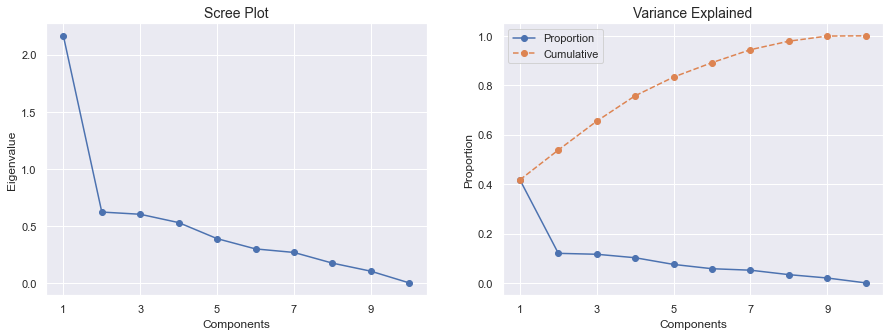

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [70]:
pca = PCA(n_components=5)
pca_feat = pca.fit_transform(data_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_data = pd.DataFrame(pca_feat, index=data_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_data

,PC0,PC1,PC2,PC3,PC4
0,-0.644105,-0.299424,-0.489028,-0.239338,0.231064
1,3.449384,-0.893009,-1.378231,-1.350073,0.349971
2,1.406560,0.378829,-0.333172,-0.656759,-0.741157
3,-0.017408,-0.302101,1.021609,-0.479295,1.508507
4,-0.544753,0.389988,0.111099,-0.421906,0.660201
...,...,...,...,...,...
10290,4.754644,1.726049,-1.096769,0.352830,-0.040842
10291,-1.161355,-0.072856,0.577954,-0.104556,-0.360567
10293,-1.190793,-0.057221,-0.279070,0.407669,-0.145093
10294,1.415829,0.866004,0.122836,-0.705764,0.261446


In [71]:
data_pca = pd.concat([data_pca, pca_data], axis=1)
data_pca.head()

,CustID,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LoyaltyYears,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',PC0,PC1,PC2,PC3,PC4
0,1.0,-0.205120,-0.666667,0.0,-0.559322,0.356256,-0.222628,-0.153710,0.456286,-0.197525,0.083333,1.0,0.0,0.0,-0.644105,-0.299424,-0.489028,-0.239338,0.231064
1,2.0,-1.153287,0.333333,0.0,0.677966,-1.032057,1.182620,-0.430947,3.593278,1.810124,0.416667,1.0,0.0,0.0,3.449384,-0.893009,-1.378231,-1.350073,0.349971
2,3.0,-0.141909,0.000000,-1.0,-0.745763,-0.433304,0.382661,-0.357223,1.293129,1.650169,-0.416667,0.0,0.0,0.0,1.406560,0.378829,-0.333172,-0.656759,-0.741157
3,4.0,-0.886536,0.333333,0.0,0.457627,-0.543433,-0.373272,1.386283,0.208041,0.060067,-0.333333,0.0,1.0,0.0,-0.017408,-0.302101,1.021609,-0.479295,1.508507
4,5.0,-0.466814,0.333333,0.0,0.305085,0.183036,-0.354702,0.184825,-0.144225,0.355006,0.000000,0.0,1.0,0.0,-0.544753,0.389988,0.111099,-0.421906,0.660201


In [72]:
def _color_red_or_green(val):
    if val < -0.6:
        color = 'background-color: red'
    elif val > 0.6:
        color = 'background-color: green'
    else:
        color = ''
    return color


In [73]:
loadings = data_pca[[i for i in list(data_pca.columns) if i not in non_metric_features]].corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

,PC0,PC1,PC2,PC3,PC4
LoyaltyYears,-0.014284,0.000607,-0.026276,0.010230,0.094660
MonthSal,-0.346773,-0.119582,0.415679,0.033738,-0.785775
GeoLivArea,0.008870,-0.014174,0.009152,-0.014339,-0.030725
Children,-0.151319,0.167526,-0.483487,-0.039352,0.573027
ClaimsRate,0.079022,-0.064677,0.235557,-0.238605,0.139502
PremMotor,-0.909813,0.109604,-0.365525,-0.030896,-0.109069
PremHousehold,0.760257,-0.027946,-0.123107,0.627595,-0.054935
PremHealth,0.278510,-0.211421,0.859604,0.031751,0.337840
PremLife,0.768657,-0.498984,-0.223865,-0.319458,-0.080406
PremWork,0.779054,0.570064,0.049526,-0.236761,-0.094349


In [74]:
data7 = data_pca.copy()

In [75]:
data7

,CustID,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LoyaltyYears,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',PC0,PC1,PC2,PC3,PC4
0,1.0,-0.205120,-0.666667,0.0,-0.559322,0.356256,-0.222628,-0.153710,0.456286,-0.197525,0.083333,1.0,0.0,0.0,-0.644105,-0.299424,-0.489028,-0.239338,0.231064
1,2.0,-1.153287,0.333333,0.0,0.677966,-1.032057,1.182620,-0.430947,3.593278,1.810124,0.416667,1.0,0.0,0.0,3.449384,-0.893009,-1.378231,-1.350073,0.349971
2,3.0,-0.141909,0.000000,-1.0,-0.745763,-0.433304,0.382661,-0.357223,1.293129,1.650169,-0.416667,0.0,0.0,0.0,1.406560,0.378829,-0.333172,-0.656759,-0.741157
3,4.0,-0.886536,0.333333,0.0,0.457627,-0.543433,-0.373272,1.386283,0.208041,0.060067,-0.333333,0.0,1.0,0.0,-0.017408,-0.302101,1.021609,-0.479295,1.508507
4,5.0,-0.466814,0.333333,0.0,0.305085,0.183036,-0.354702,0.184825,-0.144225,0.355006,0.000000,0.0,1.0,0.0,-0.544753,0.389988,0.111099,-0.421906,0.660201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,10291.0,-1.185525,0.000000,0.0,0.220339,-1.360396,3.111783,-0.557653,1.860455,3.950281,-0.666667,0.0,0.0,0.0,4.754644,1.726049,-1.096769,0.352830,-0.040842
10291,10292.0,0.433944,-0.333333,-1.0,0.406780,0.439492,-0.347817,0.102785,-0.335673,-0.244994,0.166667,0.0,0.0,1.0,-1.161355,-0.072856,0.577954,-0.104556,-0.360567
10293,10294.0,0.263274,-0.666667,0.0,-0.864407,0.485507,0.000000,-0.192114,-0.274197,-0.467492,-0.666667,0.0,1.0,0.0,-1.190793,-0.057221,-0.279070,0.407669,-0.145093
10294,10295.0,-0.335335,-0.333333,0.0,-0.118644,-0.515005,0.326952,0.332274,0.815571,1.962655,0.416667,0.0,0.0,0.0,1.415829,0.866004,0.122836,-0.705764,0.261446


In [76]:
#Based on the Principal Component Analysis we decided to reduce the input space a little bit more
data7.drop(columns= ["LoyaltyYears", "GeoLivArea"], inplace=True)

In [77]:
metric_features = [
 'MonthSal',
 'Children',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

<a class="anchor" id="clustering">

## 6. Clustering

</a>

<HR
<a class="anchor" id="fillmissingvalues">

## 6.1. K-means

</a>

In [78]:
from sklearn.cluster import KMeans

In [79]:
range_clusters = range(1, 10)

In [80]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(data7[metric_features])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

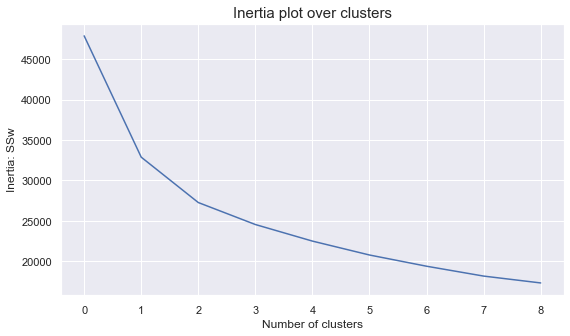

In [81]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [82]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(data7[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(data7[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is : 0.3575212316527218
For n_clusters = 3, the average silhouette_score is : 0.2310783456432282
For n_clusters = 4, the average silhouette_score is : 0.23234854471088784
For n_clusters = 5, the average silhouette_score is : 0.22296288591922092
For n_clusters = 6, the average silhouette_score is : 0.21820875311244195
For n_clusters = 7, the average silhouette_score is : 0.19546602996061888
For n_clusters = 8, the average silhouette_score is : 0.19932593312798572
For n_clusters = 9, the average silhouette_score is : 0.20108955828478298


### Final KMeans clustering solution

In [83]:
# final cluster solution
number_clusters = 4
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
kmeans_labels = kmclust.fit_predict(data7[metric_features])
kmeans_labels

array([1, 2, 3, ..., 1, 3, 1], dtype=int32)

In [84]:
data7[metric_features]

,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,-0.205120,0.0,-0.559322,0.356256,-0.222628,-0.153710,0.456286,-0.197525
1,-1.153287,0.0,0.677966,-1.032057,1.182620,-0.430947,3.593278,1.810124
2,-0.141909,-1.0,-0.745763,-0.433304,0.382661,-0.357223,1.293129,1.650169
3,-0.886536,0.0,0.457627,-0.543433,-0.373272,1.386283,0.208041,0.060067
4,-0.466814,0.0,0.305085,0.183036,-0.354702,0.184825,-0.144225,0.355006
...,...,...,...,...,...,...,...,...
10290,-1.185525,0.0,0.220339,-1.360396,3.111783,-0.557653,1.860455,3.950281
10291,0.433944,-1.0,0.406780,0.439492,-0.347817,0.102785,-0.335673,-0.244994
10293,0.263274,0.0,-0.864407,0.485507,0.000000,-0.192114,-0.274197,-0.467492
10294,-0.335335,0.0,-0.118644,-0.515005,0.326952,0.332274,0.815571,1.962655


In [85]:
kmeans_labels.shape

(10192,)

In [86]:
data7.shape

(10192, 17)

In [87]:
data_kmeans = pd.concat((data7, pd.Series(kmeans_labels, name='labels')), axis=1)
data_kmeans_avg=data_kmeans.groupby('labels').mean()
data_kmeans_avg

,CustID,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',PC0,PC1,PC2,PC3,PC4
labels,,,,,,,,,,,,,,,,,
0.0,5077.523374,0.008870,-0.289636,-0.073800,0.004143,0.283250,0.052042,0.313485,0.313196,0.344793,0.470443,0.064061,-0.031064,0.005626,0.008843,0.004505,-0.002371
1.0,5060.190487,0.000301,-0.296392,-0.070763,-0.003588,0.296353,0.047636,0.339661,0.326231,0.336692,0.472821,0.072165,0.000149,-0.001506,-0.001279,-0.001030,-0.005357
2.0,5172.055675,-0.009026,-0.284797,-0.053007,-0.006558,0.302732,0.042153,0.374574,0.326807,0.358672,0.445396,0.077088,0.023758,-0.021445,-0.018391,-0.015376,-0.000552
3.0,5297.418935,-0.050770,-0.286391,-0.036767,-0.054439,0.347974,0.076214,0.380407,0.394835,0.311243,0.488757,0.062722,0.115491,0.015890,0.006632,-0.004947,0.038988


In [88]:
data_kmeans

,CustID,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',PC0,PC1,PC2,PC3,PC4,labels
0,1.0,-0.205120,0.0,-0.559322,0.356256,-0.222628,-0.153710,0.456286,-0.197525,1.0,0.0,0.0,-0.644105,-0.299424,-0.489028,-0.239338,0.231064,1.0
1,2.0,-1.153287,0.0,0.677966,-1.032057,1.182620,-0.430947,3.593278,1.810124,1.0,0.0,0.0,3.449384,-0.893009,-1.378231,-1.350073,0.349971,2.0
2,3.0,-0.141909,-1.0,-0.745763,-0.433304,0.382661,-0.357223,1.293129,1.650169,0.0,0.0,0.0,1.406560,0.378829,-0.333172,-0.656759,-0.741157,3.0
3,4.0,-0.886536,0.0,0.457627,-0.543433,-0.373272,1.386283,0.208041,0.060067,0.0,1.0,0.0,-0.017408,-0.302101,1.021609,-0.479295,1.508507,0.0
4,5.0,-0.466814,0.0,0.305085,0.183036,-0.354702,0.184825,-0.144225,0.355006,0.0,1.0,0.0,-0.544753,0.389988,0.111099,-0.421906,0.660201,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,10291.0,-1.185525,0.0,0.220339,-1.360396,3.111783,-0.557653,1.860455,3.950281,0.0,0.0,0.0,4.754644,1.726049,-1.096769,0.352830,-0.040842,NaN
10291,10292.0,0.433944,-1.0,0.406780,0.439492,-0.347817,0.102785,-0.335673,-0.244994,0.0,0.0,1.0,-1.161355,-0.072856,0.577954,-0.104556,-0.360567,NaN
10293,10294.0,0.263274,0.0,-0.864407,0.485507,0.000000,-0.192114,-0.274197,-0.467492,0.0,1.0,0.0,-1.190793,-0.057221,-0.279070,0.407669,-0.145093,NaN
10294,10295.0,-0.335335,0.0,-0.118644,-0.515005,0.326952,0.332274,0.815571,1.962655,0.0,0.0,0.0,1.415829,0.866004,0.122836,-0.705764,0.261446,NaN


In [89]:
data_kmeans_avg

,CustID,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',PC0,PC1,PC2,PC3,PC4
labels,,,,,,,,,,,,,,,,,
0.0,5077.523374,0.008870,-0.289636,-0.073800,0.004143,0.283250,0.052042,0.313485,0.313196,0.344793,0.470443,0.064061,-0.031064,0.005626,0.008843,0.004505,-0.002371
1.0,5060.190487,0.000301,-0.296392,-0.070763,-0.003588,0.296353,0.047636,0.339661,0.326231,0.336692,0.472821,0.072165,0.000149,-0.001506,-0.001279,-0.001030,-0.005357
2.0,5172.055675,-0.009026,-0.284797,-0.053007,-0.006558,0.302732,0.042153,0.374574,0.326807,0.358672,0.445396,0.077088,0.023758,-0.021445,-0.018391,-0.015376,-0.000552
3.0,5297.418935,-0.050770,-0.286391,-0.036767,-0.054439,0.347974,0.076214,0.380407,0.394835,0.311243,0.488757,0.062722,0.115491,0.015890,0.006632,-0.004947,0.038988


<HR
<a class="anchor" id="fillmissingvalues">

## 6.2 Hierarchical Clustering

</a>

In [90]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [91]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    
    
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        
        
        hclabels = cluster.fit_predict(df) #get cluster labels
        
        
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        
        
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        
        
        ssb = sst - np.sum(ssw_labels)  # SST = SSW + SSB
        
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

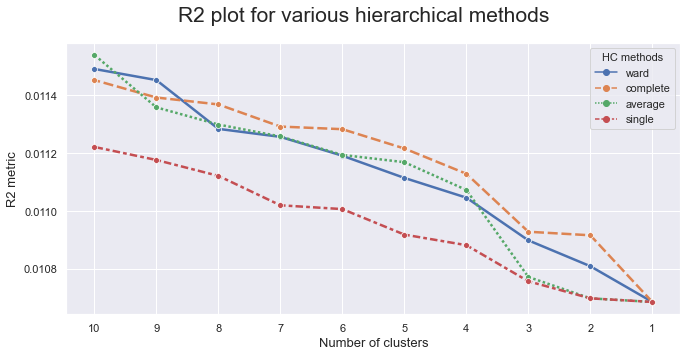

In [92]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=data7[metric_features], link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

### Defining the number of clusters:

In [93]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'complete'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(data7[metric_features])

array([5867, 6617, 8251, ...,    1,    2,    0])

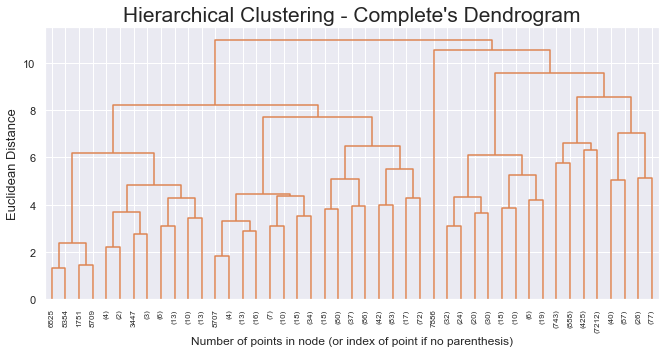

In [94]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

sns.set()
fig = plt.figure(figsize=(11,5))

y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

### Final Hierarchical clustering solution

In [95]:
# Hierarchical clustering with 4 clusters
linkage = 'complete'
distance = 'euclidean'
hc4lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=4)
hc4_labels = hc4lust.fit_predict(data6[metric_features])

In [96]:
# Characterizing the 4 clusters
data_hc4 = pd.concat((data7, pd.Series(hc4_labels, name='labels')), axis=1)
data_hc4.groupby('labels').mean()

,CustID,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',PC0,PC1,PC2,PC3,PC4
labels,,,,,,,,,,,,,,,,,
0.0,5082.007281,0.000751,-0.291145,-0.069301,-0.000130,0.291521,0.047351,0.331088,0.321332,0.340186,0.471250,0.067459,-0.010983,0.001176,-0.000720,-0.000132,-0.001758
1.0,5198.759729,-0.030583,-0.275804,-0.043936,-0.051861,0.354783,0.068022,0.400441,0.403175,0.345178,0.461929,0.076142,0.128058,0.010266,-0.004014,-0.009739,0.018655
2.0,7887.000000,-0.126106,0.000000,0.084746,0.150468,-0.141464,0.056064,-0.044884,-0.007424,0.000000,1.000000,0.000000,-0.640095,0.054811,0.030741,-0.130098,0.279720
3.0,5604.522013,-0.018814,-0.389937,-0.049568,-0.119324,0.344370,0.220248,0.375738,0.366598,0.301887,0.465409,0.106918,0.140557,-0.046464,0.174762,0.015088,0.032015


In [97]:
# Hierarchical clustering with 5 clusters
linkage = 'complete'
distance = 'euclidean'
hc5lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=5)
hc5_labels = hc5lust.fit_predict(data6[metric_features])

In [98]:
# Characterizing the 5 clusters
data_hc5 = pd.concat((data7, pd.Series(hc5_labels, name='labels')), axis=1)
data_hc5.groupby('labels').mean()

,CustID,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',PC0,PC1,PC2,PC3,PC4
labels,,,,,,,,,,,,,,,,,
0.0,5198.759729,-0.030583,-0.275804,-0.043936,-0.051861,0.354783,0.068022,0.400441,0.403175,0.345178,0.461929,0.076142,0.128058,0.010266,-0.004014,-0.009739,0.018655
1.0,5305.338384,-0.065058,-0.257576,-0.029276,-0.023206,0.318336,0.024127,0.435917,0.350513,0.297980,0.494949,0.070707,0.088091,-0.034626,-0.067661,-0.044072,0.038273
2.0,7887.000000,-0.126106,0.000000,0.084746,0.150468,-0.141464,0.056064,-0.044884,-0.007424,0.000000,1.000000,0.000000,-0.640095,0.054811,0.030741,-0.130098,0.279720
3.0,5604.522013,-0.018814,-0.389937,-0.049568,-0.119324,0.344370,0.220248,0.375738,0.366598,0.301887,0.465409,0.106918,0.140557,-0.046464,0.174762,0.015088,0.032015
4.0,5077.169784,0.002176,-0.291872,-0.070168,0.000370,0.290940,0.047854,0.328817,0.320700,0.341101,0.470736,0.067389,-0.013129,0.001952,0.000730,0.000820,-0.002625


<HR
<a class="anchor" id="fillmissingvalues">

## 6.3 DBScan

</a>

In [99]:
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

In [100]:
data_dbscan=data7.copy()

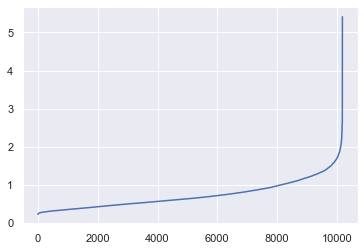

In [101]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(data_dbscan[metric_features])
distances, _ = neigh.kneighbors(data_dbscan[metric_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [102]:
dbscan = DBSCAN(eps=5, min_samples=16)

dbscan_labels = dbscan.fit_predict(data7[metric_features])
dbscan_n_clusters = len(np.unique(dbscan_labels)) 
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 2


In [103]:
np.unique(dbscan_labels)

array([-1,  0])

In [104]:
data_dbscan = pd.concat([data_dbscan[metric_features], pd.Series(dbscan_labels, index=data_dbscan.index, name="dbscan_labels")], axis=1)
data_dbscan.head()

,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,dbscan_labels
0,-0.205120,0.0,-0.559322,0.356256,-0.222628,-0.153710,0.456286,-0.197525,0
1,-1.153287,0.0,0.677966,-1.032057,1.182620,-0.430947,3.593278,1.810124,0
2,-0.141909,-1.0,-0.745763,-0.433304,0.382661,-0.357223,1.293129,1.650169,0
3,-0.886536,0.0,0.457627,-0.543433,-0.373272,1.386283,0.208041,0.060067,0
4,-0.466814,0.0,0.305085,0.183036,-0.354702,0.184825,-0.144225,0.355006,0


In [105]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [106]:
sst = get_ss(data7[metric_features])  # get total sum of squares
ssw_labels = data_dbscan.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0008


<HR
<a class="anchor" id="fillmissingvalues">

## 6.4 Mean-Shift

</a>

In [107]:
data_meanshift=data7.copy()

In [108]:
bandwidth = estimate_bandwidth(data_meanshift[metric_features], quantile=0.06, random_state=1, n_jobs=-1)
bandwidth

1.4719998168734612

In [109]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(data_meanshift[metric_features])

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 16


In [110]:
data_meanshift = pd.concat([data_meanshift[metric_features], pd.Series(ms_labels, index=data_meanshift.index, name="ms_labels")], axis=1)
data_meanshift.head()

,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,ms_labels
0,-0.205120,0.0,-0.559322,0.356256,-0.222628,-0.153710,0.456286,-0.197525,0
1,-1.153287,0.0,0.677966,-1.032057,1.182620,-0.430947,3.593278,1.810124,5
2,-0.141909,-1.0,-0.745763,-0.433304,0.382661,-0.357223,1.293129,1.650169,5
3,-0.886536,0.0,0.457627,-0.543433,-0.373272,1.386283,0.208041,0.060067,0
4,-0.466814,0.0,0.305085,0.183036,-0.354702,0.184825,-0.144225,0.355006,0


In [111]:
data_meanshift['ms_labels'].unique()

array([ 0,  5,  3,  8, 11,  1,  7,  2,  4, 10, 15,  6, 12,  9, 14, 13])

In [112]:
# Computing the R^2 of the cluster solution
sst = get_ss(data6[metric_features])  # get total sum of squares
ssw_labels = data_meanshift.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.4454


<HR
<a class="anchor" id="fillmissingvalues">

## 6.5 Self organizing maps

</a>

In [113]:
#!conda install git
#!pip install -U git+https://github.com/sevamoo/SOMPY.git

In [114]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

## Clustering with SOMs: K-means SOM vs Emergent SOM

In [115]:
np.random.seed(42)

sm = sompy.SOMFactory().build(
    data7[metric_features].values, 
    mapsize=[50, 50], 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=metric_features
)
sm.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 100

 epoch: 1 ---> elapsed time:  0.543000, quantization error: 2.219801

 epoch: 2 ---> elapsed time:  0.598000, quantization error: 2.644453

 epoch: 3 ---> elapsed time:  0.586000, quantization error: 2.615576

 epoch: 4 ---> elapsed time:  0.599000, quantization error: 2.602354

 epoch: 5 ---> elapsed time:  0.599000, quantization error: 2.594396

 epoch: 6 ---> elapsed time:  0.595000, quantization error: 2.590602

 epoch: 7 ---> elapsed time:  0.586000, quantization error: 2.588790

 epoch: 8 ---> elapsed time:  0.596000, quantization error: 2.587322

 epoch: 9 ---> elapsed time:  0.601000, quantization error: 2.585579

 epoch: 10 ---> elapsed time:  0.600000, quantization error: 2.583988

 epoch: 11 ---> elapsed time:  0.594000, quantization error: 2.582211

 epoch: 12 ---> elapsed time:  0.598000, quantization error: 2.579925

 epoch: 13 --->

 epoch: 14 ---> elapsed time:  0.639000, quantization error: 1.805253

 epoch: 15 ---> elapsed time:  0.637000, quantization error: 1.797653

 epoch: 16 ---> elapsed time:  0.653000, quantization error: 1.789942

 epoch: 17 ---> elapsed time:  0.647000, quantization error: 1.782184

 epoch: 18 ---> elapsed time:  0.647000, quantization error: 1.774368

 epoch: 19 ---> elapsed time:  0.633000, quantization error: 1.766500

 epoch: 20 ---> elapsed time:  0.627000, quantization error: 1.758551

 epoch: 21 ---> elapsed time:  0.648000, quantization error: 1.750526

 epoch: 22 ---> elapsed time:  0.634000, quantization error: 1.742451

 epoch: 23 ---> elapsed time:  0.642000, quantization error: 1.734303

 epoch: 24 ---> elapsed time:  0.655000, quantization error: 1.726082

 epoch: 25 ---> elapsed time:  0.650000, quantization error: 1.717730

 epoch: 26 ---> elapsed time:  0.642000, quantization error: 1.709256

 epoch: 27 ---> elapsed time:  0.639000, quantization error: 1.700756

 epoch

In [116]:
sm.codebook.matrix

array([[-1.393346,  0.169048,  0.465225, ..., -0.517382,  1.141691,
         4.438577],
       [-1.354624, -0.081855,  0.353877, ..., -0.42616 ,  1.412117,
         3.892368],
       [-1.407256, -0.52437 ,  0.371161, ..., -0.453951,  1.923599,
         3.445845],
       ...,
       [ 0.13757 ,  0.641435, -1.748581, ..., -1.672783, -0.819213,
        -0.796607],
       [-0.027797,  0.641435, -1.749901, ..., -1.673381, -0.821451,
        -0.80504 ],
       [-0.165385,  0.641435, -1.782411, ..., -1.730985, -0.824262,
        -0.826749]])

/Users/simaopereira/opt/anaconda3/lib/python3.8/site-packages/sompy/visualization/plot_tools.py:45: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(shape[0], shape[1], comp + 1, aspect='equal')


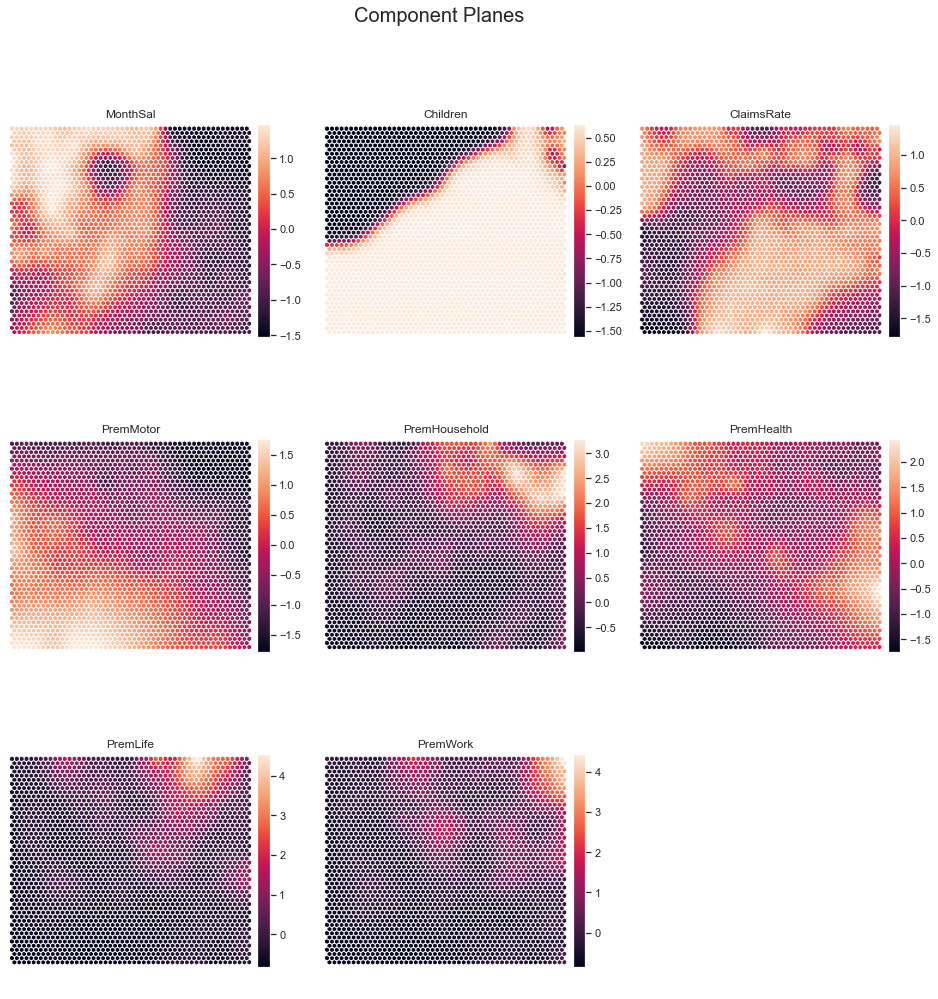

In [117]:
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

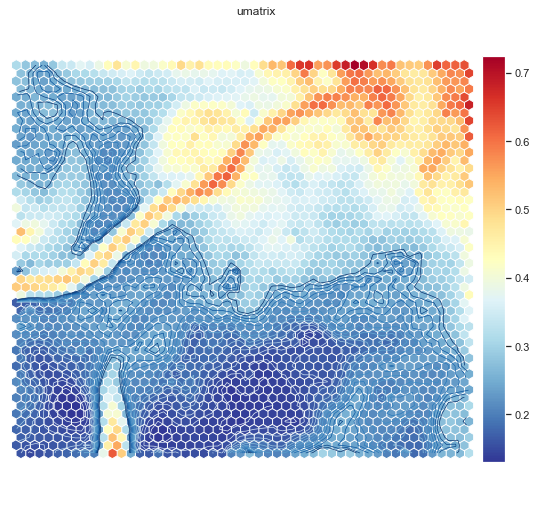

In [118]:
u = sompy.umatrix.UMatrixView(9, 9, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance=2, 
    row_normalized=False, 
    show_data=False, 
    contour=True~
)

### K-Means on top of SOM units

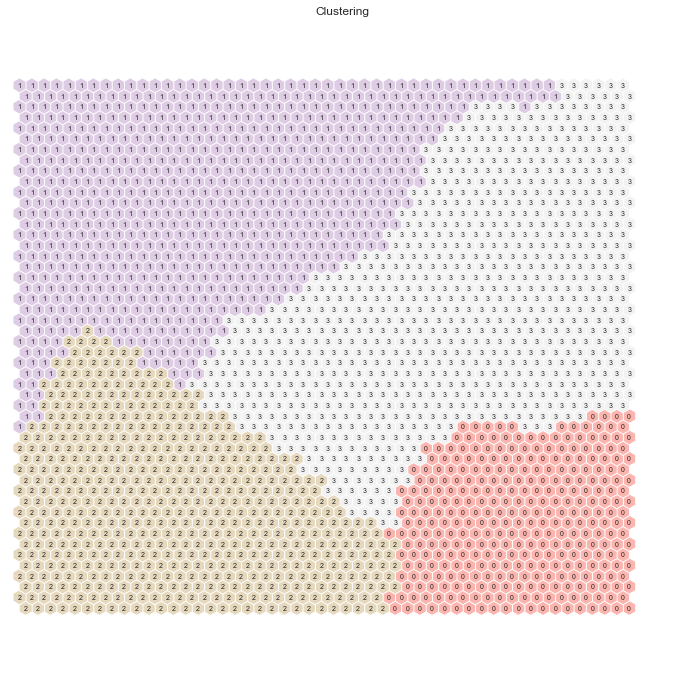

In [119]:
# Perform K-Means clustering on top of the 2500 untis (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

### Hierarchical Clustering on top of SOM units

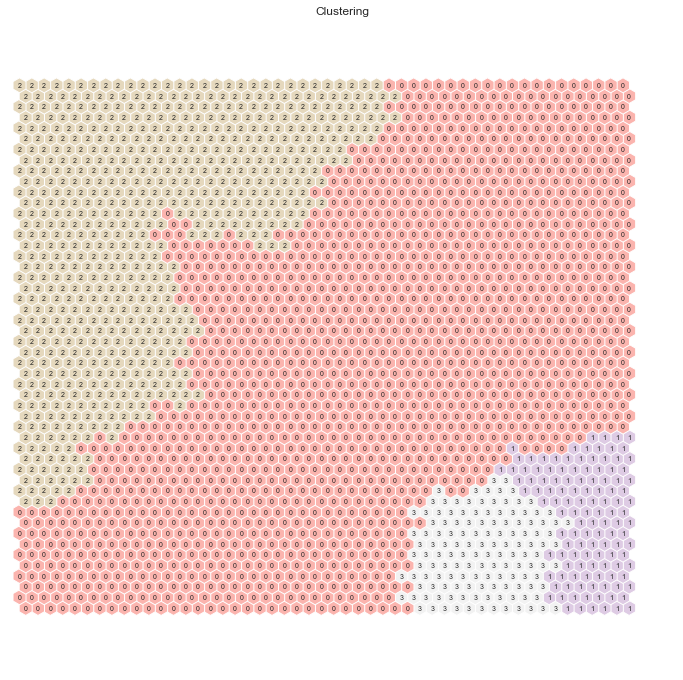

In [120]:
# Perform Hierarchical clustering on top of the 2500 untis (sm.get_node_vectors() output)
hierclust = AgglomerativeClustering(n_clusters=4, linkage='complete')
nodeclus_labels = hierclust.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

### Final SOM Clustering solution

In [121]:
nodes = sm.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=metric_features)
df_nodes['label'] = nodeclus_labels
df_nodes

,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,label
0,-1.393346,0.169048,0.465225,-1.643690,0.213416,-0.517382,1.141691,4.438577,1
1,-1.354624,-0.081855,0.353877,-1.579850,0.160656,-0.426160,1.412117,3.892368,1
2,-1.407256,-0.524370,0.371161,-1.601278,0.208668,-0.453951,1.923599,3.445845,1
3,-1.474857,-0.764826,0.479557,-1.623401,0.240872,-0.565029,2.449388,3.111789,1
4,-1.446307,-0.133917,0.361245,-1.657114,0.183133,-0.633466,2.741964,3.053266,1
...,...,...,...,...,...,...,...,...,...
2495,0.437597,0.641435,-1.709642,1.680033,-0.871057,-1.630255,-0.786327,-0.841888,2
2496,0.283907,0.641435,-1.725215,1.707887,-0.875931,-1.667571,-0.807270,-0.838590,2
2497,0.137570,0.641435,-1.748581,1.708630,-0.828984,-1.672783,-0.819213,-0.796607,2
2498,-0.027797,0.641435,-1.749901,1.716955,-0.830777,-1.673381,-0.821451,-0.805040,2


In [127]:
bmus_map = sm.find_bmu(data7[metric_features])[0]

df_bmus = pd.DataFrame(
    np.concatenate((data7, np.expand_dims(bmus_map,1)), axis=1),
    index=data7.index, columns=np.append(data7.columns,"BMU")
)
df_bmus

,index,CustID,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',PC0,PC1,PC2,PC3,PC4,BMU
0,0.0,1.0,-0.205120,0.0,-0.559322,0.356256,-0.222628,-0.153710,0.456286,-0.197525,1.0,0.0,0.0,-0.644105,-0.299424,-0.489028,-0.239338,0.231064,1487.0
1,1.0,2.0,-1.153287,0.0,0.677966,-1.032057,1.182620,-0.430947,3.593278,1.810124,1.0,0.0,0.0,3.449384,-0.893009,-1.378231,-1.350073,0.349971,158.0
2,2.0,3.0,-0.141909,-1.0,-0.745763,-0.433304,0.382661,-0.357223,1.293129,1.650169,0.0,0.0,0.0,1.406560,0.378829,-0.333172,-0.656759,-0.741157,727.0
3,3.0,4.0,-0.886536,0.0,0.457627,-0.543433,-0.373272,1.386283,0.208041,0.060067,0.0,1.0,0.0,-0.017408,-0.302101,1.021609,-0.479295,1.508507,1555.0
4,4.0,5.0,-0.466814,0.0,0.305085,0.183036,-0.354702,0.184825,-0.144225,0.355006,0.0,1.0,0.0,-0.544753,0.389988,0.111099,-0.421906,0.660201,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10187,10290.0,10291.0,-1.185525,0.0,0.220339,-1.360396,3.111783,-0.557653,1.860455,3.950281,0.0,0.0,0.0,4.754644,1.726049,-1.096769,0.352830,-0.040842,300.0
10188,10291.0,10292.0,0.433944,-1.0,0.406780,0.439492,-0.347817,0.102785,-0.335673,-0.244994,0.0,0.0,1.0,-1.161355,-0.072856,0.577954,-0.104556,-0.360567,845.0
10189,10293.0,10294.0,0.263274,0.0,-0.864407,0.485507,0.000000,-0.192114,-0.274197,-0.467492,0.0,1.0,0.0,-1.190793,-0.057221,-0.279070,0.407669,-0.145093,1340.0
10190,10294.0,10295.0,-0.335335,0.0,-0.118644,-0.515005,0.326952,0.332274,0.815571,1.962655,0.0,0.0,0.0,1.415829,0.866004,0.122836,-0.705764,0.261446,777.0


In [128]:
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final

,index,CustID,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',PC0,PC1,PC2,PC3,PC4,BMU,label
0,0.0,1.0,-0.205120,0.0,-0.559322,0.356256,-0.222628,-0.153710,0.456286,-0.197525,1.0,0.0,0.0,-0.644105,-0.299424,-0.489028,-0.239338,0.231064,1487.0,2
1,1.0,2.0,-1.153287,0.0,0.677966,-1.032057,1.182620,-0.430947,3.593278,1.810124,1.0,0.0,0.0,3.449384,-0.893009,-1.378231,-1.350073,0.349971,158.0,3
2,2.0,3.0,-0.141909,-1.0,-0.745763,-0.433304,0.382661,-0.357223,1.293129,1.650169,0.0,0.0,0.0,1.406560,0.378829,-0.333172,-0.656759,-0.741157,727.0,0
3,3.0,4.0,-0.886536,0.0,0.457627,-0.543433,-0.373272,1.386283,0.208041,0.060067,0.0,1.0,0.0,-0.017408,-0.302101,1.021609,-0.479295,1.508507,1555.0,0
4,4.0,5.0,-0.466814,0.0,0.305085,0.183036,-0.354702,0.184825,-0.144225,0.355006,0.0,1.0,0.0,-0.544753,0.389988,0.111099,-0.421906,0.660201,1414.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10187,10290.0,10291.0,-1.185525,0.0,0.220339,-1.360396,3.111783,-0.557653,1.860455,3.950281,0.0,0.0,0.0,4.754644,1.726049,-1.096769,0.352830,-0.040842,300.0,1
10188,10291.0,10292.0,0.433944,-1.0,0.406780,0.439492,-0.347817,0.102785,-0.335673,-0.244994,0.0,0.0,1.0,-1.161355,-0.072856,0.577954,-0.104556,-0.360567,845.0,2
10189,10293.0,10294.0,0.263274,0.0,-0.864407,0.485507,0.000000,-0.192114,-0.274197,-0.467492,0.0,1.0,0.0,-1.190793,-0.057221,-0.279070,0.407669,-0.145093,1340.0,2
10190,10294.0,10295.0,-0.335335,0.0,-0.118644,-0.515005,0.326952,0.332274,0.815571,1.962655,0.0,0.0,0.0,1.415829,0.866004,0.122836,-0.705764,0.261446,777.0,0


In [129]:
# Characterizing the final clusters
df_final.drop(columns='BMU').groupby('label').mean()

,index,CustID,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',PC0,PC1,PC2,PC3,PC4
label,,,,,,,,,,,,,,,,,,
0,5164.304008,5165.304008,0.059364,-0.311229,0.012658,-0.102982,0.256122,0.305236,0.277517,0.291585,0.372974,0.478927,0.055408,-0.003143,-0.053642,0.284500,0.002420,0.076083
1,5310.553822,5311.553822,-0.814081,-0.238690,-0.076522,-0.987705,1.877854,-0.106933,1.262241,2.816732,0.394696,0.101404,0.001560,3.083317,1.217664,-0.451922,0.061037,0.072373
2,5066.511811,5067.511811,0.197996,-0.248906,-0.329500,0.760539,-0.345214,-0.644419,-0.301604,-0.348690,0.211724,0.621172,0.139108,-1.443380,0.121381,-0.513067,-0.012271,-0.274853
3,5085.457203,5086.457203,-0.740594,-0.286013,0.043664,-0.951702,1.822762,-0.038145,2.989945,0.702605,0.421712,0.116910,0.004175,2.806868,-1.448822,-0.977167,-0.057410,0.137003


## Analysing the appropriateness of our solution
### R²

In [130]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss

sst = get_ss(df_final[metric_features])
ssw_labels = df_final[metric_features + ["label"]].groupby(by='label').apply(get_ss)
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
r2

0.38973511831287516

<HR
<a class="anchor" id="fillmissingvalues">

## 6.6 Kmodes - Categorical data

</a>

In [131]:
#!pip install kmodes
import numpy as np
from kmodes.kmodes import KModes

In [132]:
data_kmodes = data5.copy()

In [133]:
data_kmodes[non_metric_features]

,EducDeg
0,b'2 - High School'
1,b'2 - High School'
2,b'1 - Basic'
3,b'3 - BSc/MSc'
4,b'3 - BSc/MSc'
...,...
10290,b'1 - Basic'
10291,b'4 - PhD'
10293,b'3 - BSc/MSc'
10294,b'1 - Basic'


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5401.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 5401.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 5401.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 5401.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 5401.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4704.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 4704.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Ru

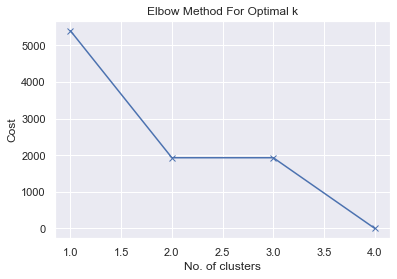

In [134]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_kmodes[non_metric_features])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [135]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
kmode_lables = kmode.fit_predict(data_kmodes[non_metric_features])
kmode_lables

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1931.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1931.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1931.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1234, cost: 4167.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1234, cost: 697.0
Best run was number 5


array([1, 1, 2, ..., 0, 2, 0], dtype=uint16)

In [136]:
data_kmodes.insert(0, "Cluster-EducDeg", kmode_lables, True)
data_kmodes

,Cluster-EducDeg,CustID,EducDeg,MonthSal,GeoLivArea,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LoyaltyYears
0,1,1.0,b'2 - High School',2177.0,1.0,1.0,0.39,375.85,79.45,146.36,47.01,16.89,31.0
1,1,2.0,b'2 - High School',677.0,4.0,1.0,1.12,77.46,416.20,116.69,194.48,106.13,35.0
2,2,3.0,b'1 - Basic',2277.0,3.0,0.0,0.28,206.15,224.50,124.58,86.35,99.02,25.0
3,0,4.0,b'3 - BSc/MSc',1099.0,4.0,1.0,0.99,182.48,43.35,311.17,35.34,28.34,26.0
4,0,5.0,b'3 - BSc/MSc',1763.0,4.0,1.0,0.90,338.62,47.80,182.59,18.78,41.45,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,2,10291.0,b'1 - Basic',626.0,3.0,1.0,0.85,6.89,878.50,103.13,113.02,201.26,22.0
10291,0,10292.0,b'4 - PhD',3188.0,2.0,0.0,0.96,393.74,49.45,173.81,9.78,14.78,32.0
10293,0,10294.0,b'3 - BSc/MSc',2918.0,1.0,1.0,0.21,403.63,132.80,142.25,12.67,4.89,22.0
10294,2,10295.0,b'1 - Basic',1971.0,2.0,1.0,0.65,188.59,211.15,198.37,63.90,112.91,35.0


<a class="anchor" id="clusteranalysis">

## 7. Cluster Analysis

</a>

In [137]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
from collections import Counter
from sklearn.base import clone

sns.set()

# Clustering by Perspectives
- Demographic/Behavioral Perspective:
- Product Perspective:

In [138]:
# Split variables into perspectives
demographic_features = [
    'MonthSal',
    'Children',
    
]

preference_features = [ 
    'ClaimsRate', 
    'PremMotor',
    'PremHousehold', 
    'PremHealth', 
    "PremLife",
    "PremWork"
    
]

df_dem = data7[demographic_features].copy()
df_prf = data7[preference_features].copy()

## Testing on K-means and Hierarchical clustering

In [139]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    affinity='euclidean'
)

## OPTIMAL CLUSTER METHOD

In [140]:
number_clusters = 4
kmeans2 = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)

linkage = 'ward'
distance = 'euclidean'
hclust2 = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=4)

kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)

In [158]:
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(data7, kmeans2, min_k=2, max_k=10)
for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        data7, hierarchical.set_params(linkage=linkage)
    )
r2_scores['kmode'] = get_r2_scores(data7, kmode, min_k=2, max_k=10)
pd.DataFrame(r2_scores)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 101, cost: 169225.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3710, cost: 169187.0
Run 2, iteration: 2/100, moves: 602, cost: 169166.0
Run 2, iteration: 3/100, moves: 3, cost: 169166.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2125, cost: 168406.0
Run 3, iteration: 2/100, moves: 88, cost: 168406.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1399, cost: 169166.0
Run 4, iteration: 2/100, moves: 42, cost: 169166.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1007, cost: 170004.0
Run 5, iteration: 2/100, moves: 16, cost: 170004.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
St

Run 4, iteration: 3/100, moves: 141, cost: 158068.0
Run 4, iteration: 4/100, moves: 6, cost: 158068.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1718, cost: 159290.0
Run 5, iteration: 2/100, moves: 35, cost: 159290.0
Best run was number 3


,kmeans,complete,average,single,ward,kmode
2,0.749965,0.731523,0.748713,0.000165,0.654388,0.000004
3,0.888702,0.871187,0.841164,0.000209,0.887785,0.000302
4,0.937440,0.924704,0.921576,0.000240,0.921370,0.000476
5,0.959958,0.954266,0.949724,0.000277,0.945542,0.000175
6,0.972207,0.966875,0.965331,0.000405,0.969403,0.000698
7,0.979566,0.976412,0.975566,0.000491,0.976031,0.000413
8,0.984339,0.982785,0.981310,0.000766,0.981549,0.000328
9,0.987625,0.986066,0.985296,0.000794,0.986297,0.000972


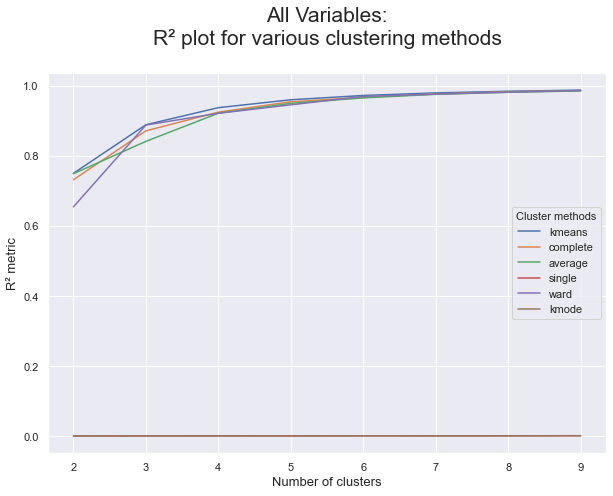

In [159]:
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("All Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

### Finding the optimal clusterer on demographic and product variables

In [142]:
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_dem, kmeans2, min_k=2, max_k=10)
for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_dem, hierarchical.set_params(linkage=linkage)
    )
r2_scores['kmode'] = get_r2_scores(data7, kmode, min_k=2, max_k=10)
pd.DataFrame(r2_scores)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1436, cost: 147314.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 24, cost: 147317.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1962, cost: 147314.0
Run 3, iteration: 2/100, moves: 0, cost: 147314.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 32, cost: 147317.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 30, cost: 153416.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29, cost: 147192.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 671, cost: 145362.0
Init: 

,kmeans,complete,average,single,ward,kmode
2,0.551659,0.461751,0.528960,0.487762,0.528054,0.000014
3,0.777731,0.570637,0.625895,0.488236,0.770392,0.000057
4,0.854373,0.776373,0.845038,0.493495,0.831700,0.000188
5,0.902475,0.839288,0.846848,0.495162,0.885098,0.000294
6,0.927169,0.902173,0.878685,0.503678,0.918855,0.000397
7,0.947227,0.916626,0.900011,0.503679,0.936910,0.000567
8,0.957091,0.938308,0.938047,0.504172,0.951263,0.000259
9,0.965972,0.939606,0.939378,0.504173,0.964022,0.000477


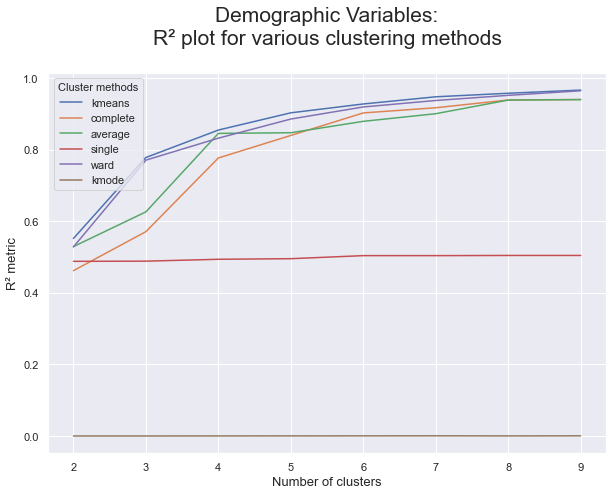

In [143]:
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

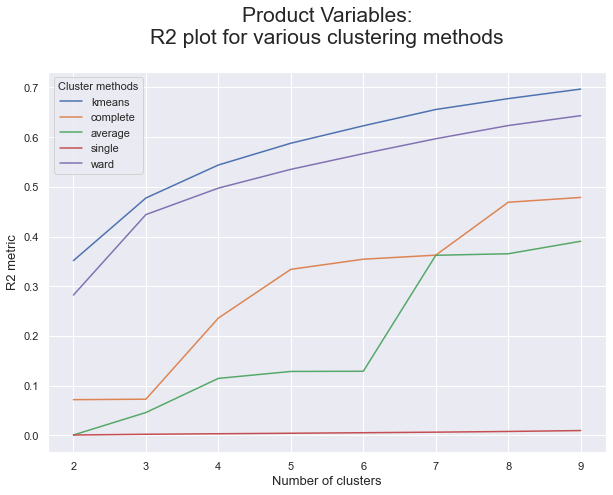

In [144]:
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_prf, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_prf, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Product Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

### Merging Both Perspectives

In [145]:
number_clusters = 4
kmeans3 = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)

In [146]:
kmeans_prod = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=20,
    random_state=42
)
prod_labels = kmeans_prod.fit_predict(df_prf)

kmeans_behav = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=20,
    random_state=42
)
behavior_labels = kmeans_behav.fit_predict(df_dem)

data7['product_labels'] = prod_labels
data7['behavior_labels'] = behavior_labels

In [147]:
df_centroids = data7.groupby(['behavior_labels', 'product_labels'])\
    [metric_features].mean()

final_labels = kmeans3.fit_predict(df_centroids)
df_centroids['final_labels'] = final_labels

df_centroids

MonthSal  Children  ClaimsRate  PremMotor  \
behavior_labels product_labels                                              
0               0               0.301080       0.0   -0.002279  -0.125768   
                1               0.376370       0.0   -0.100081  -0.504888   
                2               0.227435       0.0   -0.160271   0.675539   
                3               0.273798       0.0   -0.087968  -0.470161   
1               0              -0.592049       0.0    0.003682  -0.307266   
                1              -0.816416       0.0   -0.012808  -0.932372   
                2              -0.446503       0.0   -0.142959   0.578553   
                3              -0.816572       0.0   -0.027286  -0.894880   
2               0              -0.497028      -1.0   -0.029417  -0.332203   
                1              -0.825131      -1.0   -0.096495  -0.929980   
                2              -0.227056      -1.0   -0.156430   0.610411   
                3              -0.809765      -1.0   -0.039369  -0.938054   
3               0               0.752479      -1.0    0.023582  -0.326312   
                1               0.746860      -1.0   -0.096307  -0.715538   
                2               0.661986      -1.0   -0.127104   0.456432   
                3               0.682714      -1.0   -0.032334  -0.698036   

                                PremHousehold  PremHealth  PremLife  PremWork  \
behavior_labels product_labels                                                  
0               0                    0.328006    0.268006  0.341997  0.379023   
                1                    0.980525   -0.177560  0.723546  2.207631   
                2                   -0.281711   -0.555194 -0.255114 -0.281083   
                3                    1.346922   -0.201184  1.910418  0.351097   
1               0                    0.326801    0.674151  0.272930  0.332392   
                1                    1.525521   -0.017902  1.075045  2.919789   
                2                   -0.291230   -0.343670 -0.260712 -0.288573   
                3                    1.788054    0.013016  2.560491  0.762608   
2               0                    0.513202    0.472206  0.438519  0.524870   
                1                    1.575351   -0.099442  1.216545  2.878254   
                2                   -0.235160   -0.510432 -0.166166 -0.290278   
                3                    1.738883    0.030829  2.850253  0.757883   
3               0                    0.305928    0.729738  0.285939  0.285711   
                1                    1.115806    0.229713  0.600453  2.199322   
                2                   -0.247139   -0.177624 -0.188588 -0.238347   
                3                    1.366814    0.148602  2.136939  0.408984   

                                final_labels  
behavior_labels product_labels                
0               0                          3  
                1                          0  
                2                          1  
                3                          2  
1               0                          3  
                1                          0  
                2                          1  
                3                          2  
2               0                          3  
                1                          0  
                2                          1  
                3                          2  
3               0                          3  
                1                          0  
                2                          1  
                3                          2

In [148]:
cluster_mapper = df_centroids['final_labels'].to_dict()

data_merged = data7.copy()

data_merged['merged_labels'] = data_merged.apply(
    lambda row: cluster_mapper[
        (row['behavior_labels'], row['product_labels'])
    ], axis=1
)

data_merged.groupby('merged_labels').mean()[metric_features]

,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
merged_labels,,,,,,,,
0,-0.407042,-0.347872,-0.053588,-0.839791,1.395982,-0.014794,0.978185,2.700819
1,0.078566,-0.161298,-0.150633,0.615912,-0.278599,-0.441250,-0.245438,-0.277701
2,-0.373938,-0.367326,-0.037937,-0.808560,1.638951,0.016487,2.440336,0.638262
3,0.095771,-0.397474,0.007925,-0.272975,0.327716,0.590904,0.300702,0.334963


In [149]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
   
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

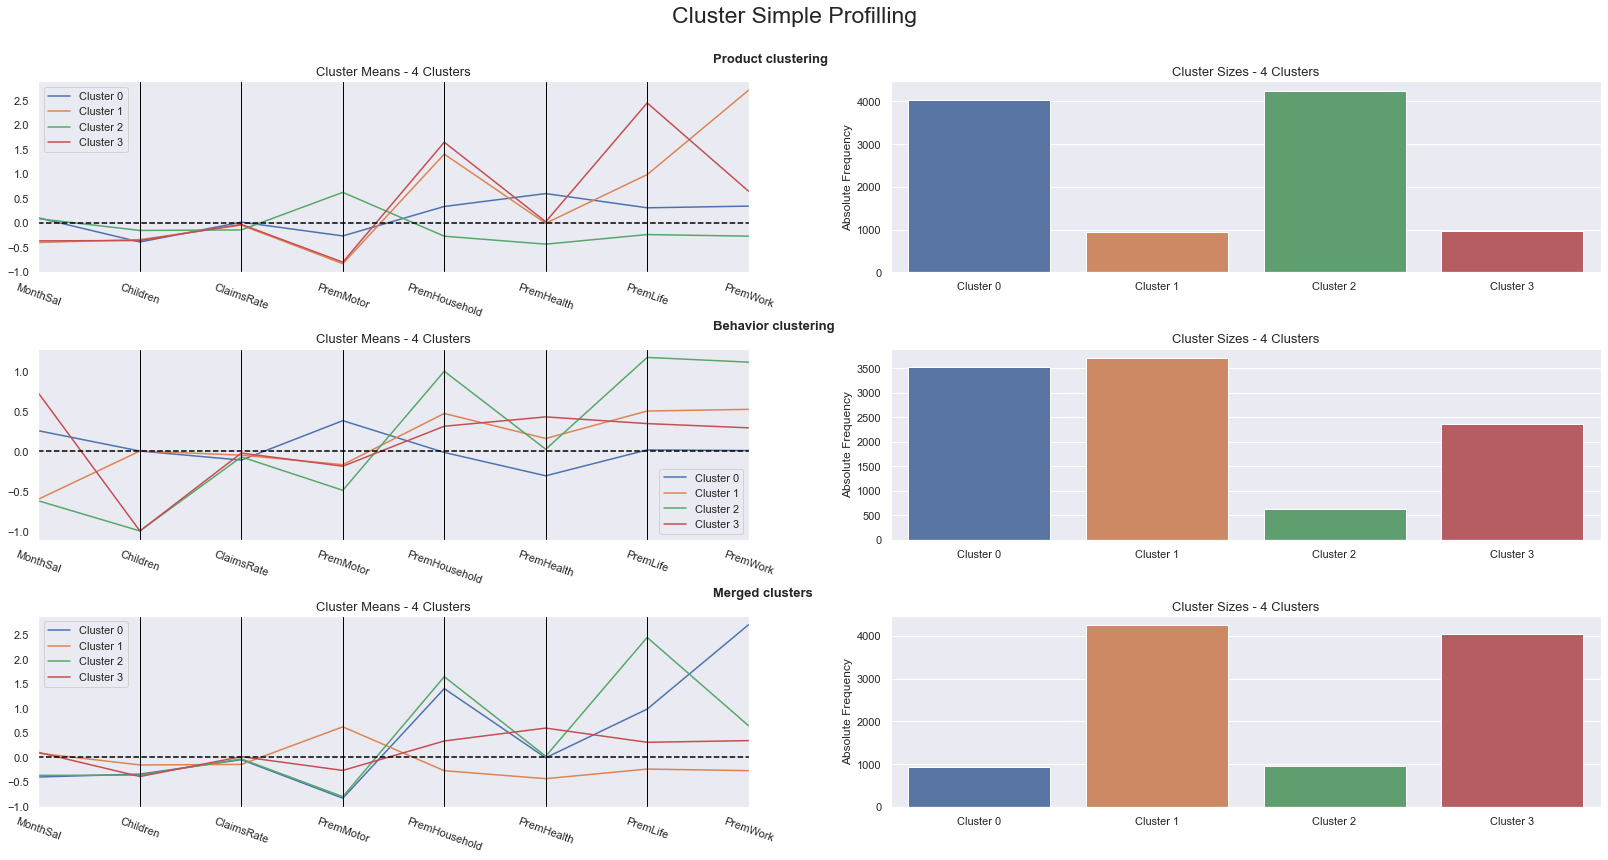

In [150]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = data_merged[metric_features + ['product_labels', 'behavior_labels', 'merged_labels']], 
    label_columns = ['product_labels', 'behavior_labels', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Product clustering", "Behavior clustering", "Merged clusters"]
)

## Final Cluster Solution

In [151]:
data7 = data7.reset_index()

In [152]:
number_clusters = 4
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
kmeans_labels = kmclust.fit_predict(data7[metric_features])

data_final = pd.concat((data7, pd.Series(kmeans_labels, name='Clusters')), axis=1)
data_final

,level_0,index,CustID,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,...,x0_b'3 - BSc/MSc',x0_b'4 - PhD',PC0,PC1,PC2,PC3,PC4,product_labels,behavior_labels,Clusters
0,0,0,1.0,-0.205120,0.0,-0.559322,0.356256,-0.222628,-0.153710,0.456286,...,0.0,0.0,-0.644105,-0.299424,-0.489028,-0.239338,0.231064,2,1,1
1,1,1,2.0,-1.153287,0.0,0.677966,-1.032057,1.182620,-0.430947,3.593278,...,0.0,0.0,3.449384,-0.893009,-1.378231,-1.350073,0.349971,3,1,2
2,2,2,3.0,-0.141909,-1.0,-0.745763,-0.433304,0.382661,-0.357223,1.293129,...,0.0,0.0,1.406560,0.378829,-0.333172,-0.656759,-0.741157,1,2,3
3,3,3,4.0,-0.886536,0.0,0.457627,-0.543433,-0.373272,1.386283,0.208041,...,1.0,0.0,-0.017408,-0.302101,1.021609,-0.479295,1.508507,0,1,0
4,4,4,5.0,-0.466814,0.0,0.305085,0.183036,-0.354702,0.184825,-0.144225,...,1.0,0.0,-0.544753,0.389988,0.111099,-0.421906,0.660201,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10187,10187,10290,10291.0,-1.185525,0.0,0.220339,-1.360396,3.111783,-0.557653,1.860455,...,0.0,0.0,4.754644,1.726049,-1.096769,0.352830,-0.040842,1,1,3
10188,10188,10291,10292.0,0.433944,-1.0,0.406780,0.439492,-0.347817,0.102785,-0.335673,...,0.0,1.0,-1.161355,-0.072856,0.577954,-0.104556,-0.360567,2,3,1
10189,10189,10293,10294.0,0.263274,0.0,-0.864407,0.485507,0.000000,-0.192114,-0.274197,...,1.0,0.0,-1.190793,-0.057221,-0.279070,0.407669,-0.145093,2,0,1
10190,10190,10294,10295.0,-0.335335,0.0,-0.118644,-0.515005,0.326952,0.332274,0.815571,...,0.0,0.0,1.415829,0.866004,0.122836,-0.705764,0.261446,1,1,3


In [153]:
data_final.to_csv('data_final.csv')

In [154]:
data_final_avg=data_final.groupby('Clusters').mean()
data_final_avg

,level_0,index,CustID,MonthSal,Children,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,...,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',PC0,PC1,PC2,PC3,PC4,product_labels,behavior_labels
Clusters,,,,,,,,,,,,,,,,,,,,,
0,5078.472243,5130.632918,5131.632918,0.153316,-0.442651,0.010516,-0.282171,0.338208,0.579079,0.328679,...,0.397897,0.470775,0.044754,0.202165,-0.122917,0.593339,0.042143,0.044768,0.119345,1.612130
1,5058.609411,5110.649281,5111.649281,0.050046,-0.135141,-0.149973,0.607892,-0.270309,-0.429598,-0.245508,...,0.238526,0.605239,0.117988,-1.227142,0.102235,-0.377525,-0.028584,-0.017823,1.923968,0.695874
2,5164.189362,5217.254255,5218.254255,-0.450809,-0.338298,-0.060368,-0.822099,1.734291,0.019038,2.399127,...,0.463830,0.158511,0.003191,2.339247,-1.140584,-0.699431,0.173096,-0.023632,2.854255,1.390426
3,5288.909305,5343.102473,5344.102473,-0.518444,-0.306243,-0.040926,-0.877619,1.388268,-0.024846,1.054203,...,0.445230,0.124853,0.002356,2.671782,1.335354,-0.164968,-0.249379,-0.098884,1.010601,1.299176


In [155]:
data_final_avg.to_csv('data_final_avg.csv')

## Cluster visualization using t-SNE

In [156]:
two_dim = TSNE(random_state=42).fit_transform(data_final[metric_features])

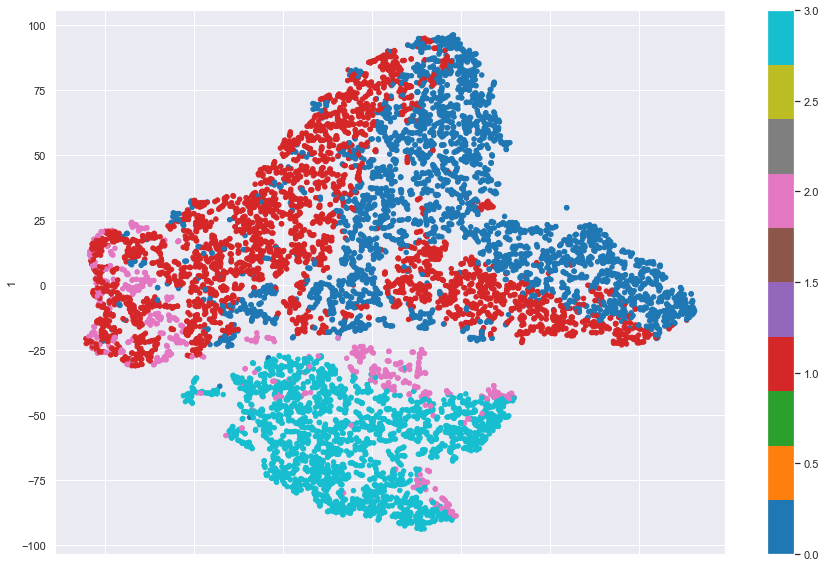

In [157]:
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=data_final['behavior_labels'], colormap='tab10', figsize=(15,10))
plt.show()